# Cluster Analysis Project
###### Willi Kristen

#### Herangehensweise an eine Clusteranalyse:
## Clustering of Customer Types

###### Data: https://www.kaggle.com/vetrirah/customer


###### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [147]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

###### Laden der Daten

In [148]:
df_orig = pd.read_csv("pokemon.csv", index_col="pokedex_number")

df_orig.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1118 entries, 1 to 898
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           1118 non-null   object 
 1   abilities                      1118 non-null   object 
 2   typing                         1118 non-null   object 
 3   hp                             1118 non-null   int64  
 4   attack                         1118 non-null   int64  
 5   defense                        1118 non-null   int64  
 6   special_attack                 1118 non-null   int64  
 7   special_defense                1118 non-null   int64  
 8   speed                          1118 non-null   int64  
 9   height                         1118 non-null   int64  
 10  weight                         1118 non-null   int64  
 11  genus                          1118 non-null   object 
 12  gen_introduced                 1118 non-null   in

In [149]:
df_orig.head()

,name,abilities,typing,hp,attack,defense,special_attack,special_defense,speed,height,...,ground_attack_effectiveness,fly_attack_effectiveness,psychic_attack_effectiveness,bug_attack_effectiveness,rock_attack_effectiveness,ghost_attack_effectiveness,dragon_attack_effectiveness,dark_attack_effectiveness,steel_attack_effectiveness,fairy_attack_effectiveness
pokedex_number,,,,,,,,,,,,,,,,,,,,,
1,Bulbasaur,Overgrow~Chlorophyll,Grass~Poison,45,49,49,65,65,45,7,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,Ivysaur,Overgrow~Chlorophyll,Grass~Poison,60,62,63,80,80,60,10,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,Venusaur,Overgrow~Chlorophyll,Grass~Poison,80,82,83,100,100,80,20,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,Venusaur Gmax,Overgrow~Chlorophyll,Grass~Poison,80,82,83,100,100,80,240,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,Venusaur Mega,Thick Fat,Grass~Poison,80,100,123,122,120,80,24,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5


In [150]:
df_orig.describe()

,hp,attack,defense,special_attack,special_defense,speed,height,weight,gen_introduced,female_rate,...,ground_attack_effectiveness,fly_attack_effectiveness,psychic_attack_effectiveness,bug_attack_effectiveness,rock_attack_effectiveness,ghost_attack_effectiveness,dragon_attack_effectiveness,dark_attack_effectiveness,steel_attack_effectiveness,fairy_attack_effectiveness
count,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,...,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000
mean,70.025939,80.678891,74.756708,73.231664,72.572451,69.479428,21.427549,993.305009,4.129696,0.382603,...,1.141324,1.154964,0.980098,0.989267,1.244633,1.024150,0.971377,1.067755,0.995081,1.092129
std,26.646333,32.056040,30.954899,32.454237,27.782111,30.036549,58.158211,2067.911505,2.337694,0.247861,...,0.786124,0.592281,0.497864,0.605663,0.701525,0.566403,0.380929,0.465632,0.519945,0.540864
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.000000,0.250000,0.250000,0.250000
25%,50.000000,55.000000,50.250000,50.000000,50.000000,45.000000,5.000000,88.000000,2.000000,0.125000,...,1.000000,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000
50%,68.000000,78.500000,70.000000,65.000000,70.000000,67.000000,10.000000,302.500000,4.000000,0.500000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,80.750000,100.000000,90.000000,95.000000,90.000000,90.000000,16.000000,800.000000,6.000000,0.500000,...,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000,1000.000000,10000.000000,8.000000,1.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000


###### Filtern auf, für die CLusteranalyse relevante Features

In [151]:
df = df_orig[["hp", "attack", "defense", "special_attack", "special_defense", "speed", "normal_attack_effectiveness", "fire_attack_effectiveness", "water_attack_effectiveness", 
              "electric_attack_effectiveness", "grass_attack_effectiveness", "ice_attack_effectiveness", "fighting_attack_effectiveness", "poison_attack_effectiveness", "ground_attack_effectiveness", 
              "fly_attack_effectiveness", "psychic_attack_effectiveness", "bug_attack_effectiveness", "rock_attack_effectiveness", "ghost_attack_effectiveness", "dragon_attack_effectiveness", 
              "dark_attack_effectiveness", "steel_attack_effectiveness", "fairy_attack_effectiveness"]]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1118 entries, 1 to 898
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   hp                             1118 non-null   int64  
 1   attack                         1118 non-null   int64  
 2   defense                        1118 non-null   int64  
 3   special_attack                 1118 non-null   int64  
 4   special_defense                1118 non-null   int64  
 5   speed                          1118 non-null   int64  
 6   normal_attack_effectiveness    1118 non-null   float64
 7   fire_attack_effectiveness      1118 non-null   float64
 8   water_attack_effectiveness     1118 non-null   float64
 9   electric_attack_effectiveness  1118 non-null   float64
 10  grass_attack_effectiveness     1118 non-null   float64
 11  ice_attack_effectiveness       1118 non-null   float64
 12  fighting_attack_effectiveness  1118 non-null   fl

In [152]:
df.head()

,hp,attack,defense,special_attack,special_defense,speed,normal_attack_effectiveness,fire_attack_effectiveness,water_attack_effectiveness,electric_attack_effectiveness,...,ground_attack_effectiveness,fly_attack_effectiveness,psychic_attack_effectiveness,bug_attack_effectiveness,rock_attack_effectiveness,ghost_attack_effectiveness,dragon_attack_effectiveness,dark_attack_effectiveness,steel_attack_effectiveness,fairy_attack_effectiveness
pokedex_number,,,,,,,,,,,,,,,,,,,,,
1,45,49,49,65,65,45,1.0,2.0,0.5,0.5,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,60,62,63,80,80,60,1.0,2.0,0.5,0.5,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,80,82,83,100,100,80,1.0,2.0,0.5,0.5,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,80,82,83,100,100,80,1.0,2.0,0.5,0.5,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,80,100,123,122,120,80,1.0,2.0,0.5,0.5,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5


###### Visualisierung mit TSNE (Nicht interpretierbares Ergebnis einer Dimensionsreduktion) für einen ersten Überblick, über die Verteilung der Daten.

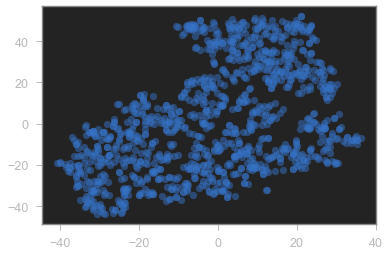

In [153]:
%matplotlib inline

model = TSNE(learning_rate=150)
X_tsne = model.fit_transform(df)

xs_tsne = X_tsne[:, 0]
ys_tsne = X_tsne[:, 1]

plt.scatter(xs_tsne, ys_tsne, alpha=0.5)    
plt.show()

###### Scatterplot, der beiden Features, die uns am meisten für das CLustern interessieren

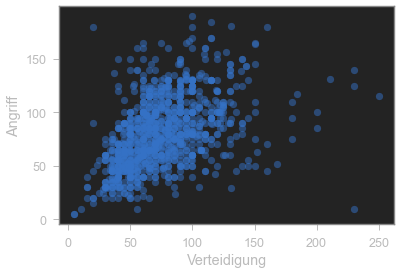

In [154]:
X = df[["attack", "defense"]]
xs = X["defense"]
ys = X["attack"]

plt.scatter(xs, ys, alpha=0.5)
plt.xlabel("Verteidigung")
plt.ylabel("Angriff")
plt.show()

###### Scalieren der Daten

In [155]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

###### Ermitteln der "optimalen" Clusteranzahl, für den KMeans-Algorithmus, nach der "Ellenbogen-Methode"

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


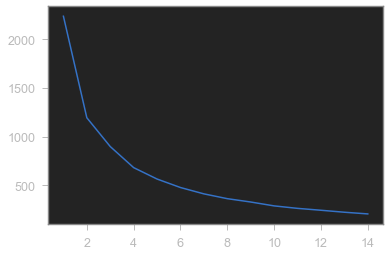

In [156]:
scores = []
tryouts = range(1, 15)

for n in tryouts:
    model = KMeans(n_clusters=n)
    model.fit(X_scaled)
    scores.append(model.inertia_)

plt.plot(tryouts, scores)
plt.show()

###### Überblick über die CLusterverteilung, wenn man nur die beiden wichtigsten Features verwendet.
###### Visualisiert in einem Scatterplot, mit den CLustercentern (orange).

In [157]:
model = KMeans(n_clusters=4)
model.fit(X_scaled)

labels = model.labels_
centers_scaled = model.cluster_centers_
centers = scaler.inverse_transform(centers_scaled)

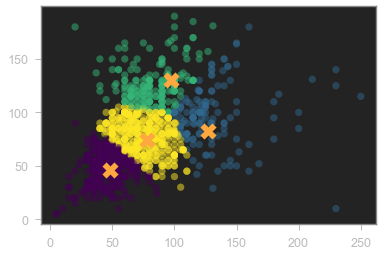

In [158]:
plt.scatter(xs, ys, c=labels, alpha=0.5)
plt.scatter(centers[:,0], centers[:,1], c='#FFA83F', marker='X', s=250)

plt.show()

###### Das ganze dreidimensional, mit einem weiteren Feature:

In [159]:
X_3d = df[["attack", "defense", "speed"]]
X_3d_scaled = scaler.fit_transform(X_3d)

model.fit(X_3d_scaled)

labels_3d = model.labels_
centers_3d_scaled = model.cluster_centers_
centers_3d = scaler.inverse_transform(centers_3d_scaled)

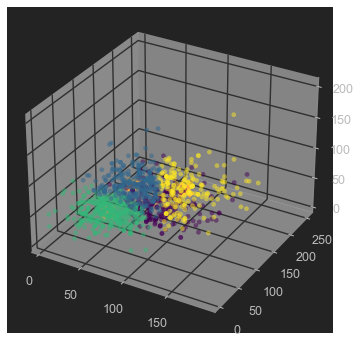

In [160]:
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_3d.iloc[:,0], X_3d.iloc[:,1], X_3d.iloc[:,2], c=labels_3d, alpha=0.5)
ax.scatter(centers_3d[:,0], centers_3d[:,1], centers_3d[:,2], c='#FFA83F', marker='X', s=250)
plt.show()

###### Einfügen der Label in das DataFrame, um die Daten nach den Clustern zu filtern und die Eigenschaften der Cluster besser untersuchen zu können.

In [161]:
df["label"] = labels_3d
df["label"] = df["label"].replace([0, 1, 2, 3], ["A", "B", "C", "D"])

cluster_A = df[df["label"] == "A"]
cluster_B = df[df["label"] == "B"]
cluster_C = df[df["label"] == "C"]
cluster_D = df[df["label"] == "D"]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


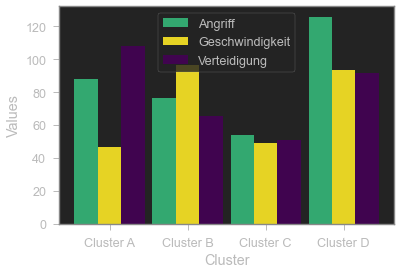

In [162]:
xs_bar = np.arange(4)
ys_att = [np.mean(cluster_A["attack"]), 
          np.mean(cluster_B["attack"]), 
          np.mean(cluster_C["attack"]), 
          np.mean(cluster_D["attack"])]
ys_def = [np.mean(cluster_A["defense"]), 
          np.mean(cluster_B["defense"]), 
          np.mean(cluster_C["defense"]), 
          np.mean(cluster_D["defense"])]
ys_spe = [np.mean(cluster_A["speed"]), 
          np.mean(cluster_B["speed"]), 
          np.mean(cluster_C["speed"]), 
          np.mean(cluster_D["speed"])]

width = 0.3

plt.bar((xs_bar-width), ys_att, width, color='#35B779', alpha=0.9)
plt.bar(xs_bar, ys_spe, width, color='#FDE725', alpha=0.9)
plt.bar((xs_bar+width), ys_def, width, color='#440154', alpha=0.9)
plt.xticks(xs_bar, ['Cluster A', 'Cluster B', 'Cluster C', 'Cluster D'])
plt.xlabel("Cluster")
plt.ylabel("Values")
plt.legend(["Angriff", "Geschwindigkeit", "Verteidigung"])
plt.show()

#### Neuer Ansatz (PCA):
###### Clustering mit deutlich mehr Features, die wir per Dimensionsreduktion mit PCA (Principal Componant Analysis) auf eine überschaubarere Anzahl an Features hinunterbrechen.

In [163]:
df = df.drop("label", axis=1)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1118 entries, 1 to 898
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   hp                             1118 non-null   int64  
 1   attack                         1118 non-null   int64  
 2   defense                        1118 non-null   int64  
 3   special_attack                 1118 non-null   int64  
 4   special_defense                1118 non-null   int64  
 5   speed                          1118 non-null   int64  
 6   normal_attack_effectiveness    1118 non-null   float64
 7   fire_attack_effectiveness      1118 non-null   float64
 8   water_attack_effectiveness     1118 non-null   float64
 9   electric_attack_effectiveness  1118 non-null   float64
 10  grass_attack_effectiveness     1118 non-null   float64
 11  ice_attack_effectiveness       1118 non-null   float64
 12  fighting_attack_effectiveness  1118 non-null   fl

###### Überprüfen, wie genau man die Daten, mit welcher Anzahl an, durch PCA reduzierten Features erfassen kann.

In [165]:
pca = PCA()
pca.fit(df)

print(np.sum(pca.explained_variance_ratio_[:5]))

0.9568528098364641


###### Mit PCA können wir die 25 Features auf 5 reduzieren und verlieren dabei nur knapp 4% der ursprünglich enthaltenen Information.

In [166]:
# Diese Dimensionsreduktion dient nur der visuellen Darstellung der tatsächlichen Ergebnisse.
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df)

###### Eine Pipline soll alle Prozessschritte enthalten, die wir auf die Daten anwenden wollen.
###### Somit können wir die daten mit einem Aufruf scalieren, die dimensionen entsprechend reduzieren und das Modell trainieren.

In [167]:
pipeline = Pipeline([("scaler", StandardScaler()),
                     ("pca", PCA(n_components=5)),
                     ("kmeans", KMeans(n_clusters=4))])

pipeline.fit(df)
labels_pl = pipeline.predict(df)
centers_pl = pipeline['kmeans'].cluster_centers_

<IPython.core.display.Javascript object>


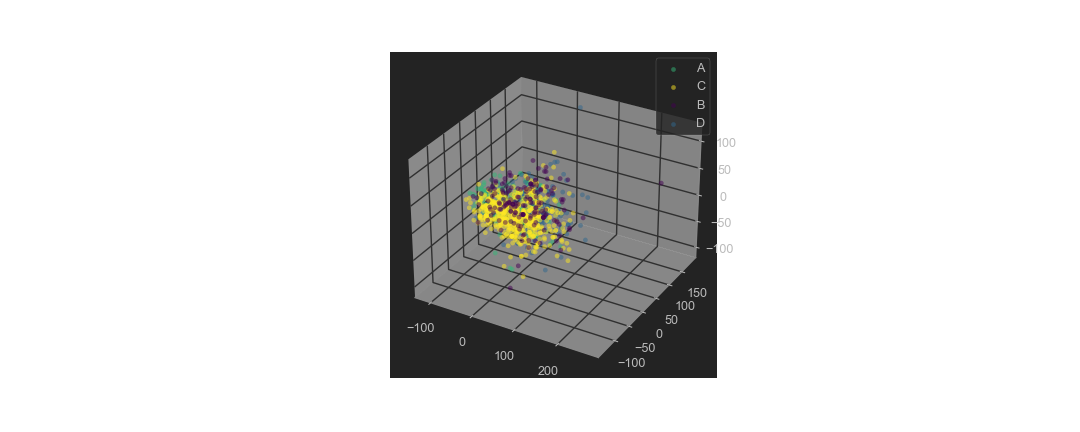

In [168]:
%matplotlib notebook

df["label"] = labels_pl
df["label"] = df["label"].replace([0, 1, 2, 3], ["A", "B", "C", "D"])

fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(111, projection='3d')
color = ['#35B779', '#FDE725', '#440154', '#31688E']

i=0
for l in df["label"].unique():
    df_filtered = df_pca[df["label"] == l,:]
    ax.scatter(df_filtered[:,0], df_filtered[:,1], df_filtered[:,2], label=l, c=color[i], alpha=0.5)
    i += 1

plt.legend()
plt.show()